<a href="https://colab.research.google.com/github/vitroid/PythonTutorials/blob/master/8OtherClasses/BlackBodyRadiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

平熱と発熱で、どれぐらい赤外線の放射量が変化するのかを考えます。

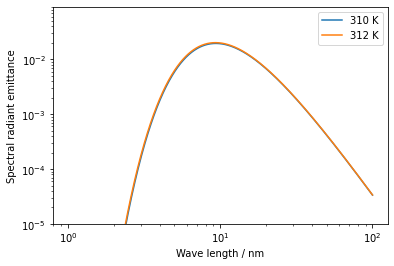

In [2]:
import numpy as np
import matplotlib.pyplot as plt

h=6.626e-34
c=2.998e8
k=1.381e-23

# 横軸=波長。対数目盛で等間隔になるように1〜100(μm)で1000点
L = np.logspace(0, 2, 1000)

def BlackBodyRadiation(L, T):
    E = h*c/(np.exp(h*c/(L*1e-6*k*T))-1) / (L*1e-6)**5
    return E

E310 = BlackBodyRadiation(L, 310)
E312 = BlackBodyRadiation(L, 312)

fig = plt.figure()
plt.loglog(L, E310, label="310 K")
plt.loglog(L, E312, label="312 K")
plt.ylim(1e-5, None)
plt.xlabel("Wave length / nm")
plt.ylabel("Spectral radiant emittance")
plt.legend()
fig.savefig("blackbody.pdf")

## 波長3μmの輻射の比。

In [ ]:
BlackBodyRadiation(3, 310) / BlackBodyRadiation(3,312)

0.905609088954732

## 波長10μmの輻射の比。

In [ ]:
BlackBodyRadiation(10, 310) / BlackBodyRadiation(10, 312)

0.9704079912714483

## Newton-Raphson法による極大振動数の求解

解きたい式は
$$\exp s={3\over 3-s}$$
すこし変形して、
$$f(s)=3\exp(-s)+s-3=0$$
$s$で微分すると、
$$f'(s) =-3e^{-s}+1$$
Newton-Raphson法による反復式は
$$s_{i+1}=s_i-{f(s_i)\over f'(s_i)}=s_i-{3e^{-s_i}+s_i-3\over-3e^{-s_i}+1}$$

In [ ]:
from math import exp
def iteration(s):
    return s - (3*exp(-s)+s-3)/(-3*exp(-s)+1)

s = 3
print(s)
s = iteration(s)
print(s)
s = iteration(s)
print(s)
s = iteration(s)
print(s)
s = iteration(s)
print(s)


3
2.8244128929932226
2.8214403305978797
2.8214393721221787
2.821439372122079


## 極大波長の求解



In [ ]:
from math import exp
def iteration(s):
    return s - (5*exp(-s)+s-5)/(-5*exp(-s)+1)

s = 5
print(s)
s = iteration(s)
print(s)
s = iteration(s)
print(s)
s = iteration(s)
print(s)
s = iteration(s)
print(s)


5
4.965135695836505
4.965114231752603
4.965114231744276
4.965114231744276


In [ ]:
# 検算
exp(s)-(5/(5-s))

1.1368683772161603e-12

In [ ]:
# sympyを使った求解
from sympy import exp, nsolve
from sympy.abc import *

nsolve(5*exp(-s)+s-5, s, 5)

4.96511423174428

## サーモグラフィーっぽい画像をつくる。

熱を測れないカメラでも、色をそれっぽくするとサーモグラフィーっぽくできるはず。

元画像をもってくる。

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/2018_Shibuya_Crossing.jpg/640px-2018_Shibuya_Crossing.jpg

--2021-07-16 05:06:20--  https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/2018_Shibuya_Crossing.jpg/640px-2018_Shibuya_Crossing.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107629 (105K) [image/jpeg]
Saving to: ‘640px-2018_Shibuya_Crossing.jpg’

640px-2018_Shibuya_ 100%[===================>] 105.11K  --.-KB/s    in 0.05s   

2021-07-16 05:06:20 (2.19 MB/s) - ‘640px-2018_Shibuya_Crossing.jpg’ saved [107629/107629]



そのまま表示。

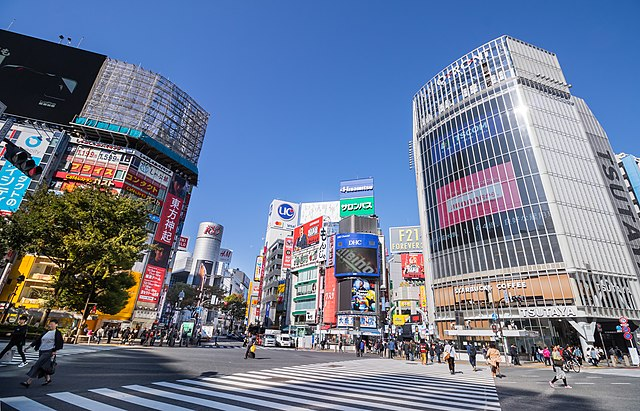

In [ ]:
from IPython.display import Image, display
display(Image('640px-2018_Shibuya_Crossing.jpg'))


OpenCV (画像処理ライブラリ)をつかって、白黒にする。

In [ ]:
import sys
import cv2
import numpy as np

img_bgr = cv2.imread("640px-2018_Shibuya_Crossing.jpg")
# グレーに
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)  
# 最大最小でスケールしてコントラストを最大化
img = np.zeros_like(img_bgr)
img = cv2.normalize(img_gray,  img, 0, 255, cv2.NORM_MINMAX)

matplotlibをつかってそのまま表示。

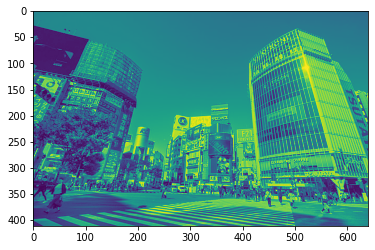

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

サーモグラフィーっぽいカラーパレットをさがす。

https://matplotlib.org/stable/tutorials/colors/colormaps.html



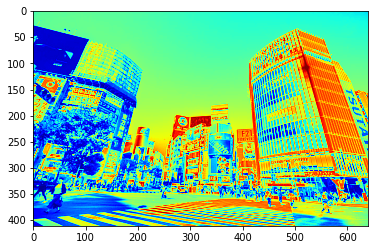

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap=plt.get_cmap('jet'))

フェイクサーモグラフィー画像のできあがり。